# Name: Mohit Anand         Roll No. 190505
### Carscan 
### Assignment 1.1

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2
import os
import random
from util import findxy, bbox

### Specify paths and opacity value

In [3]:
opacity=0.5
pathway='E:/carscan_files/'
json_path='E:/carscan_files/'

### Getting de-normalized points 

In [20]:
def findxy(mx,wi,h):
    ab=[]
    for i,j in mx:
        ab.append([i*wi,j*h])
    
    ab=np.array(ab)
    
    return ab

### Main function

In [23]:
def bbox(pathway,json_path,opacity):
    im=cv2.imread(pathway)
    data=json.load(open(json_path))
    
    # Finding the de-normalization factor using width and height 
    wi=data[1]['original_width']*0.01
    h=data[1]['original_height']*0.01
    
    #part names
    part_name=[]
    
    #normalised points
    cv1=[]
    
    for i in data:
        if(i['type']=='polygonlabels'):
            part_name.append(i['value']['polygonlabels'][0]) 
            cv1.append(i['value']['points'])
    
    
    # Saving the de-normalized points
    points=[]
    for i in cv1:
        points.append(findxy(i,wi,h))
    
    
    # Printing the image along with the (calculations given in the loop) bounding box and using randomized colors for each part
    v=0
    for j in points:
        j=np.array(j)
        imc=im.copy()
        cv2.fillPoly(im,  np.int32([j]), color=(random.randint(0,255),random.randint(0,255),random.randint(0,255)))
        x=[]
        y=[]
        for p in j:
            x.append(p[0])
            y.append(p[1])
        min_x=int(min(x))
        max_x=int(max(x))
        min_y=int(min(y))
        max_y=int(max(y))
        
        cv2.rectangle(im, (max_x, max_y), (min_x, min_y), (0, 255, 0), 2) 
        cv2.putText(im,part_name[v],(min_x,max_y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0, 0, 0),2,cv2.LINE_AA)
        cv2.addWeighted(imc,1-opacity,im,opacity,0,im)
        v=v+1
        
        
    return im

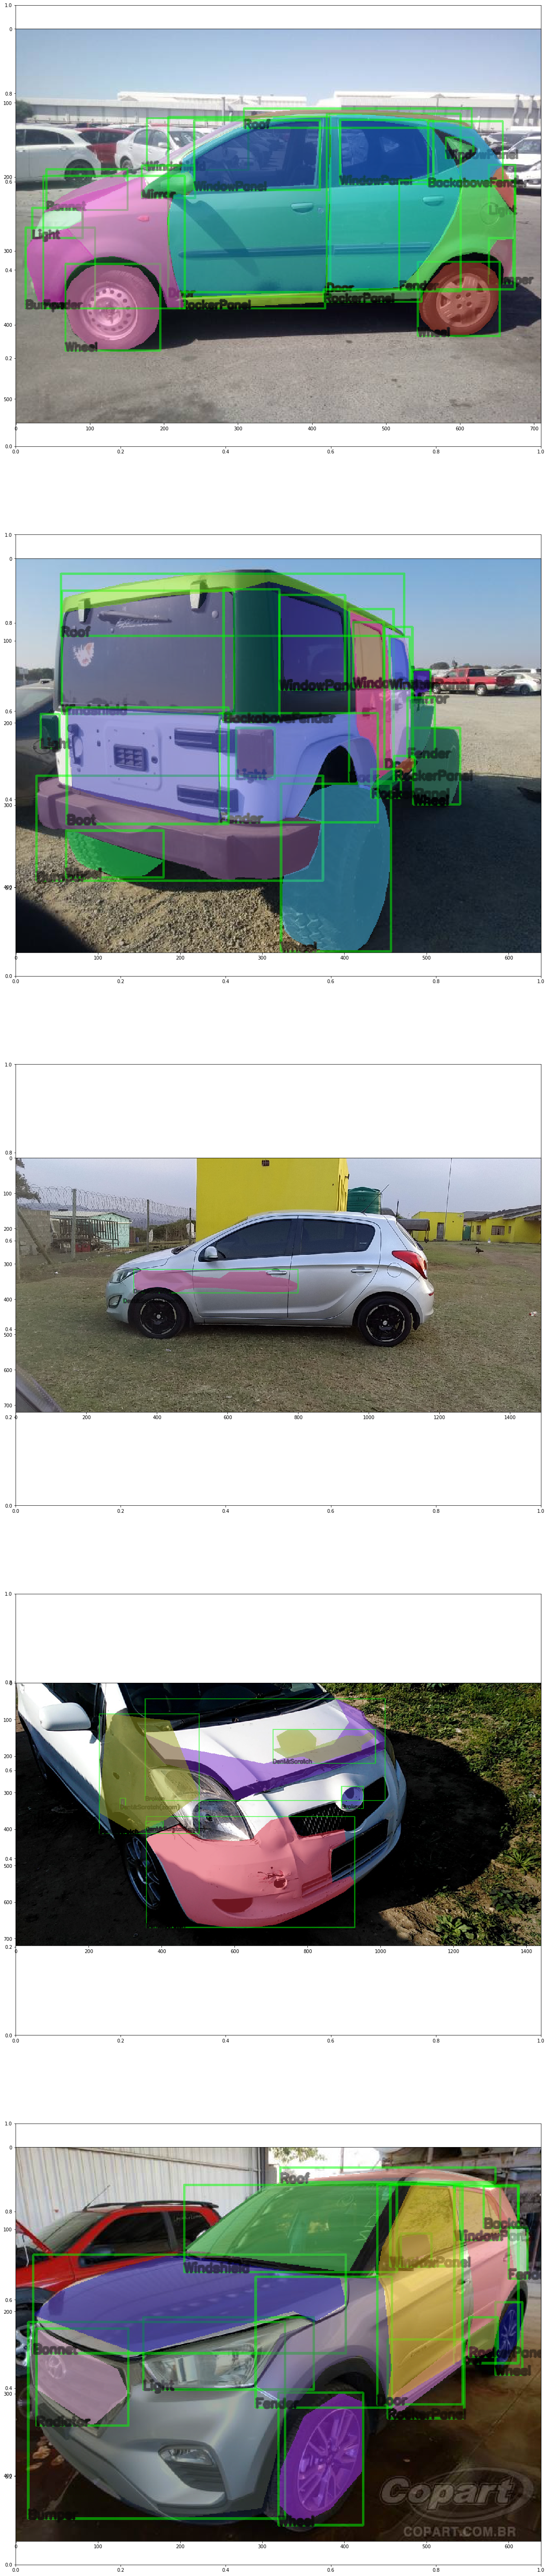

In [4]:
fig, ax = plt.subplots(nrows=5, ncols=1,figsize=(20,100))
a=1
for ee in range(1,6):
    image= os.path.join(pathway,str(ee)+'.jpg')
    json_data = os.path.join(json_path,str(ee)+'.json')
    output1 = bbox(image,json_data,opacity)
    fig.add_subplot(5, 1, a)
    plt.imshow(cv2.cvtColor(output1, cv2.COLOR_BGR2RGB))
    a=a+1
